Qui viene sperimentato l'addestramento del dataset forest fires con i vari modelli senza eseguire alcun tipo di preprocessing al fine di vedere i modelli come si comportano con i dati non raffinati (le codifiche dei giorni e dei mesi verranno eseguite tramite ordinal encding, il che potrebbe aggiungere relazioni d'ordine superflue ai modelli, confondendoli).
Piu precisamente questa versione è stata introdotta successivamente alla prima per vedere le differenze nel preproccessing effettuato sui mesi e i giorni (l'area viene sempre trasformata in logaritmica a causa dei valori estremamente sbilanciati)
L'approccio della versione 1 ha leggermente migliorato i risultati (di molto poco... non nel Lienar Regressor)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import evaluation


from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, make_scorer
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn import preprocessing
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPRegressor

from mlxtend.plotting import plot_decision_regions
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from scipy.stats import boxcox

In [2]:
pd.set_option('display.max_columns', None)

file_path = './dataset/forestfires.csv'

# CSV -> DataFrame
df = pd.read_csv(file_path)

df['area'] = np.log(df['area'] + 1)
max_area = df['area'].max()

df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [3]:
# Encoding mesi, giorni

ordinal_encoder = OrdinalEncoder(categories=[['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']])
df['month_encoded'] = ordinal_encoder.fit_transform(df[['month']])

ordinal_encoder = OrdinalEncoder(categories=[['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun',]])
df['day_encoded'] = ordinal_encoder.fit_transform(df[['day']])

df.drop(columns=['day', 'month'], inplace=True)
df

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,month_encoded,day_encoded
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.000000,2.0,4.0
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.000000,9.0,1.0
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.000000,9.0,5.0
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.000000,2.0,4.0
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.000000,2.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,2.006871,7.0,6.0
513,2,4,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,4.012592,7.0,6.0
514,7,4,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,2.498152,7.0,6.0
515,1,4,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.000000,7.0,5.0


- LINEAR REGRESSOR:

Mean Absolute Error: 1.1624955004864976 -> km^2 = 0.021979036971170395
Train error (MAE): 1.114198741800278
------------
Mean Squared Error: 2.1529140377163083
Root Mean Squared Error: 1.4672811720036172 -> km^2 = 0.033374263790689446
51 / 104 of y_test is 0
------------
Precisione del modello rispetto all'area massima: 79.03%
------------
Accuracy in percentage (with a tolerance of 5.0%): 10.58%
Accuracy in percentage (with a tolerance of 10.0%): 20.19%
Accuracy in percentage (with a tolerance of 25.0%): 79.81%
Accuracy in percentage (with a tolerance of 50.0%): 94.23%


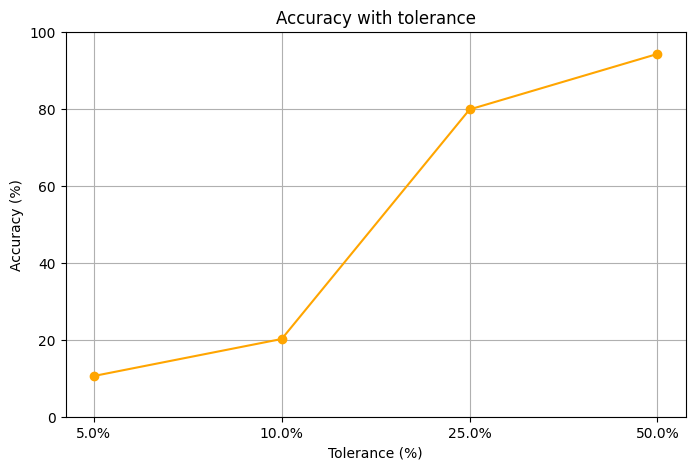

In [4]:
# LINEAR REGRESSOR

X = df.drop(['area'], axis=1)  # Features
y = df['area']  # Target

# Normalizzare variabili numeriche
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Divisione del dataset in training e testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Modello
model = LinearRegression()
model.fit(X_train, y_train)

# Predizioni
y_pred = model.predict(X_test)

# Predizioni  sui dati di addestramento
y_train_pred = model.predict(X_train)

# Valutazione performace
print('- LINEAR REGRESSOR:\n')
evaluation.evaluate(y_test, y_pred, y_train, y_train_pred, max_area)

Best parameters: {'C': 10, 'gamma': 0.01}
- SVM:

Mean Absolute Error: 1.0947580331649245 -> km^2 = 0.019884594878182008
Train error (MAE): 0.9619051663230452
------------
Mean Squared Error: 2.541493792715267
Root Mean Squared Error: 1.594206320623296 -> km^2 = 0.03924419110806051
51 / 104 of y_test is 0
------------
Precisione del modello rispetto all'area massima: 77.21%
------------
Accuracy in percentage (with a tolerance of 5.0%): 23.08%
Accuracy in percentage (with a tolerance of 10.0%): 44.23%
Accuracy in percentage (with a tolerance of 25.0%): 77.88%
Accuracy in percentage (with a tolerance of 50.0%): 92.31%


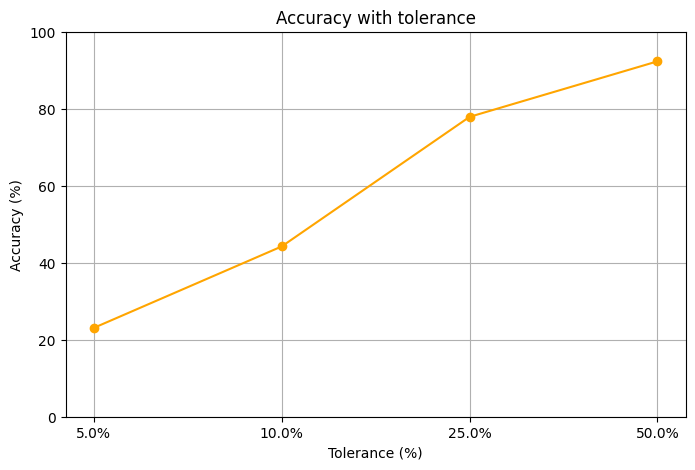

In [5]:
# SVM

X = df.drop(['area'], axis=1)  # Features
y = df['area']  # Target

# Normalizzare variabili numeriche
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Divisione del dataset in training e testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Modello
model = SVR(kernel='rbf')
#model.fit(X_train, y_train)

# Parametri da esplorare con GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],          # Penalità dell'errore
    'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10]  # Flessibilità del kernel RBF
}
# Definizione di un custom scorer
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

grid_search = GridSearchCV(model, param_grid, cv=5, scoring=mae_scorer, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Migliori parametri
print("Best parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_


# Predizioni
y_pred = best_model.predict(X_test)

# Predizioni sui dati di addestramento
y_train_pred = best_model.predict(X_train)


# Valutazione performace
print('- SVM:\n')
evaluation.evaluate(y_test, y_pred, y_train, y_train_pred, max_area)

Fitting 5 folds for each of 128 candidates, totalling 640 fits
Best parameters found:  {'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'solver': 'sgd'}
- NN:

Mean Absolute Error: 1.1649157312415999 -> km^2 = 0.022056527354445885
Train error (MAE): 1.0930122683587047
------------
Mean Squared Error: 2.1834071083000532
Root Mean Squared Error: 1.4776356480201922 -> km^2 = 0.03382571480064839
51 / 104 of y_test is 0
------------
Precisione del modello rispetto all'area massima: 78.88%
------------
Accuracy in percentage (with a tolerance of 5.0%): 10.58%
Accuracy in percentage (with a tolerance of 10.0%): 23.08%
Accuracy in percentage (with a tolerance of 25.0%): 78.85%
Accuracy in percentage (with a tolerance of 50.0%): 93.27%


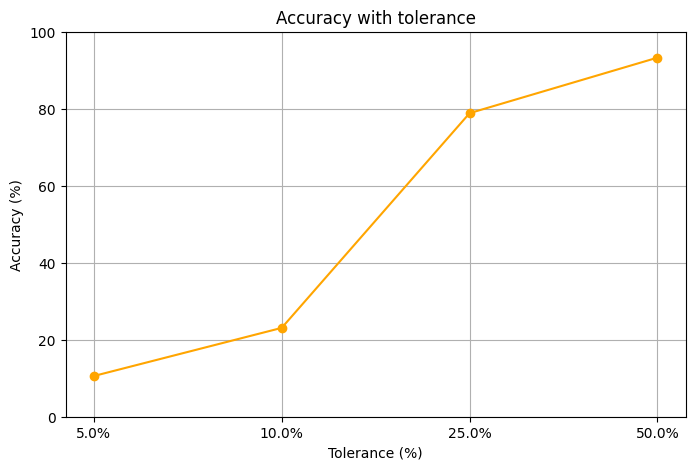

In [6]:
# NN 
X = df.drop(['area'], axis=1)  # Features
y = df['area']  # Target

# Normalizzare variabili numeriche
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Divisione del dataset in training e testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Modello
model = MLPRegressor(max_iter=1000, random_state=42)

# Parametri da ottimizzare
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50), (150, 100, 50)],  # Diversi layer e dimensioni
    'activation': ['relu', 'tanh'],  # Funzioni di attivazione
    'solver': ['adam', 'sgd'],  # Algoritmi di ottimizzazione
    'alpha': [0.00001, 0.0001, 0.001, 0.01],  # Penalizzazione L2
    'learning_rate': ['constant', 'adaptive'],  # Velocità di apprendimento
}

# Definizione di un custom scorer
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
# Grid Search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring=mae_scorer, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Migliori parametri
print("Best parameters found: ", grid_search.best_params_)
best_model = grid_search.best_estimator_

# Predizioni
y_pred = best_model.predict(X_test)

# Predizioni sui dati di addestramento
y_train_pred = best_model.predict(X_train)

# Valutazione performace
print('- NN:\n')
evaluation.evaluate(y_test, y_pred, y_train, y_train_pred, max_area)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
- GRADIENT BOOST REGRESSION:

Mean Absolute Error: 1.1887931184636242 -> km^2 = 0.022831164827230938
Train error (MAE): 1.0612809885505359
------------
Mean Squared Error: 2.1563943861291177
Root Mean Squared Error: 1.4684666785899902 -> km^2 = 0.03342571475779671
51 / 104 of y_test is 0
------------
Precisione del modello rispetto all'area massima: 79.01%
------------
Accuracy in percentage (with a tolerance of 5.0%): 10.58%
Accuracy in percentage (with a tolerance of 10.0%): 18.27%
Accuracy in percentage (with a tolerance of 25.0%): 82.69%
Accuracy in percentage (with a tolerance of 50.0%): 94.23%


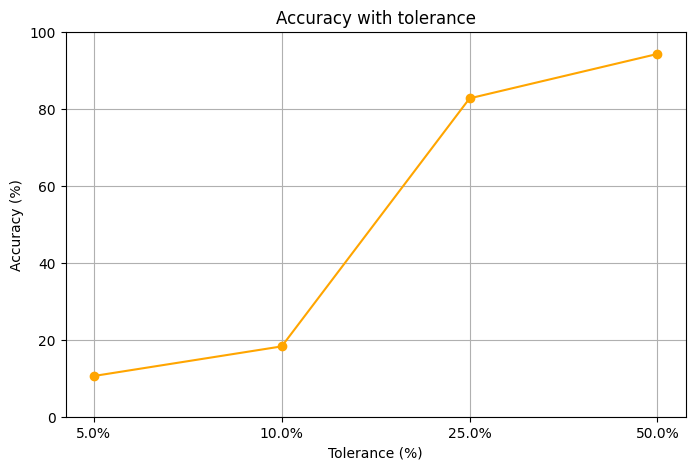

In [7]:
# GRADIENT BOOST REGRESSION
X = df.drop(['area'], axis=1)
#X = df[['temp', 'RH', 'wind', 'rain']]
y = df['area']  # Target

# Normalizzare variabili numeriche
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Divisione del dataset in training e testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# Parametri da esplorare
param_grid = {
    'n_estimators': [100, 200, 300, 500],        # Numero di alberi
    'learning_rate': [0.01, 0.1, 0.2],     # Velocità di apprendimento
    'max_depth': [3, 5, 7, 10],                # Profondità massima degli alberi
    'min_samples_split': [2, 5, 10],       # Minimo numero di campioni per split
    'min_samples_leaf': [1, 2, 4],         # Minimo numero di campioni in una foglia
}
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# Grid Search con validazione incrociata
grid_search = GridSearchCV(
    GradientBoostingRegressor(random_state=42),
    param_grid,
    scoring=mae_scorer,
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Fit dei dati di addestramento
grid_search.fit(X_train, y_train)

# Miglior modello
print("Best parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# Predizioni
y_pred = best_model.predict(X_test)

# Predizioni sui dati di addestramento
y_train_pred = best_model.predict(X_train)

# Valutazione performace
print('- GRADIENT BOOST REGRESSION:\n')
evaluation.evaluate(y_test, y_pred, y_train, y_train_pred, max_area)